# Tutorial: Logistic Regression With Python From Scratch

In this notebook, I've implemented end-to-end binary classification using logistic regression. Here, from scratch, we've written all the required functions like:

* sigmoid()
* cost()
* hyp()
* optim()
* pred()

Here, our goal is not to obtain a high accuracy, rather we'll just implement the cost and optimizer function and see if they works. We've used the pima indiian diabetes datat.

***Give an upvote, if you find the notebook helpful***

# Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Data Collection

In [ ]:
data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')  # loading the pima indians diabetes dataset

print("Shape of the dataset: " + str(data.shape)) # checking the shape of the dataset 
print("\n \nThe first few rows of the dataset: ") # checking the first few rows of the dataset
data.head()

In [ ]:
n_missing = data.isnull().sum().sum()       # checking if there is any missing value
if n_missing == 0: 
    print("There  is no missing values in the dataset")
else:
    print("Oops! Total " + str(n_missing) + " values in the dataset")


# Data Analysis

In [ ]:
dataset = data.copy() # creating a copy of the dataset, so any further change won't effect the main dataset

for col in dataset.columns[0:-1]: # now, we are normalizing the dataset along columns
    dataset[col] = dataset[col]/abs(dataset[col].max())
dataset.head()

In [ ]:
train, test = train_test_split(dataset, test_size=0.3, random_state=42, shuffle=True) # splitting into train and test set

# Defining Important Functions

In [ ]:
# defining "makeinput" function which will extract the features(x) and outcome(y) as np arrays from the dataframe
def makeinput(df_in):
    df = df_in.copy()
    x = df.iloc[:, :-1].values
    y = df.iloc[:, -1]. values
    y = y.reshape(y.shape[0], 1)      # reshape for avoiding broadcasting
    x0 = np.ones(x.shape[0]).reshape(x.shape[0], 1)
    x = np.append(x0, x, axis=1)
    return x, y

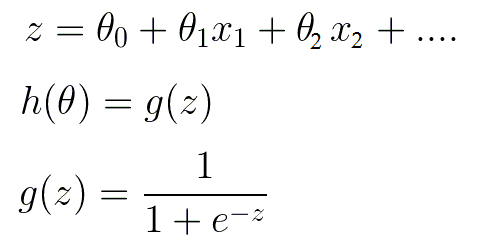

In [ ]:
# defining "sigmoid" function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# checking the output of "sigmoid" function
a = np.linspace(-5, 5, 200)
b = sigmoid(a)
plt.plot(a, b)
plt.xlabel("x")
plt.ylabel("Sigmoid Function")
plt.show()    

In [ ]:
# defining "hyp" function and it will return the hypothesis 
def hyp(theta, x):
    return np.matmul(x, theta)

Here is the equations for calculating loss:

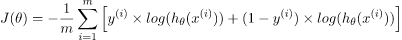

In [ ]:
# defining "cost" function, it will return the loss 
def cost(theta, x, y):
    m = x.shape[0]
    h = hyp(theta, x)
    J = -1/(m) * np.sum(y*np.log(sigmoid(h)) + (1-y)*np.log(1-sigmoid(h)))
    return J

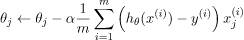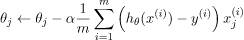

In [ ]:
# defining the optimizer

def optim(theta, x, y, alpha, epochs):
    m = x.shape[0]
    j = np.zeros(epochs)
    for i in range(epochs):
        h = hyp(theta,x)
        gd = (1/m)*np.matmul(np.transpose(x), (sigmoid(h)-y))
        theta = theta - alpha*gd 
        j[i] = cost(theta, x, y)
    return theta, j

In [ ]:
# "pred" function will predict the hyopothesis for test set
def pred(theta, x): 
    h = hyp(theta, x)
    return sigmoid(h)

# Training

In [ ]:
# Initialization of coefficient
x_train, y_train = makeinput(train)
m, n = x_train.shape
theta_init = np.zeros((n, 1))  # initializing theta

# Checking the loss without optimization
loss = cost(theta_init, x_train, y_train)
print("Loss without optimization is " + str(loss))

# Optimization with GD

alpha = 0.01        # learning rate
epochs = 50000       # no of iterations to run the loop
theta, j = optim(theta_init, x_train, y_train, alpha, epochs)
loss_opt = cost(theta, x_train, y_train)

print("Loss after optimization is " + str(loss_opt))
iteration = range(epochs)
plt.plot(iteration, j)
plt.xlabel('epochs')
plt.ylabel('Loss')

# Evaluation

In [ ]:
x_test, y_test = makeinput(test)
predictions = np.round(pred(theta, x_test))

print(accuracy_score(y_test, predictions))

**Please give your opinion in the comment section**